<a href="https://colab.research.google.com/github/jpengtelecom/Lista-1_21_03_2024/blob/main/TRABALHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
!pip install matlab
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


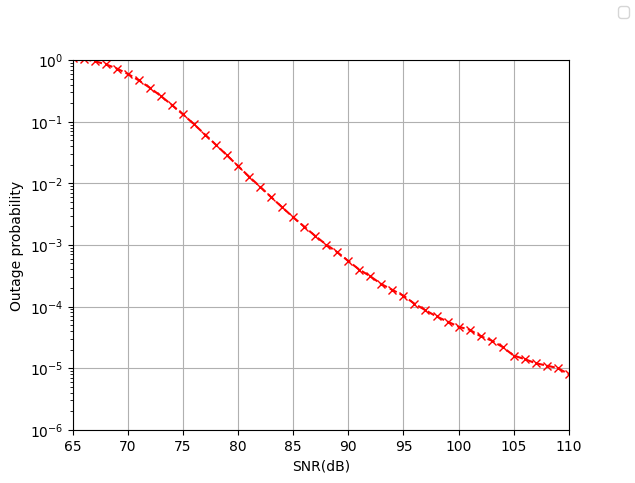

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sp
import random
from scipy import special
from scipy import signal
from scipy.stats import nakagami


# Constants
N = 1000000
f = 300e9  # THz carrier frequency (Hz)
G = 10e4 # Antenna gains (40dBi)
c = 3e8
k = 3.18e-4  # Molecular absorption coefficient (per meter)
d1 = 5  # Distance from source to RIS (m)
d2 = 25  # Distance from RIS to destination (m)
noise_floor = 3.9811e-11   # Noise floor (-74dBm)
bandwidth = 10e9  # Channel bandwidth (Hz)


alpha_1 = 2  # Alpha parameter for path 1
mu_1 = 1  # Mu parameter for path 1
alpha_2 = 2  # Alpha parameter for path 2
mu_2 = 2  # Mu parameter for path 2

calculate_path_gain = ((c*G)/ (4*np.pi*f*(d1+d2)))*np.exp(-0.5*k* (d1+d2))


media1=d1**(-alpha_2)
media2=d2**(-alpha_2)
lambda1=1/media1
lambda2=1/media2


R=2

i=0
j=0
OP1=[]
OP2=[]
N0=5000

for j in np.arange(65,111,1):

    plin = (10**(j/10)) #10**(P_dB/10)
    r1 = np.sqrt(media1)*nakagami.rvs(mu_1, loc=0, scale=1, size=N, random_state=N) #Rayleigh fading in the first path
    r2 = np.sqrt(media2)*nakagami.rvs(mu_2, loc=0, scale=1, size=N, random_state=N)  #Nakagami-2 fading in the second path
    Prob1 = np.sum(np.log2(1 + (r1**2*plin/N0)) < R) / N
    Prob2 = np.sum(np.log2(1 + (r2**2*plin/N0)) < R) / N
    OP1 = np.append(OP1, Prob1)
    OP2 = np.append(OP2, Prob2)


Pdb=np.arange(65,111,1)
plt.semilogy(Pdb,(OP2+OP1),'rx--')

plt.grid()
plt.axis([65,110,1e-6,1])
plt.xlabel('SNR(dB)')
plt.ylabel('Outage probability')
plt.figlegend([])
plt.show()

ValueError: 'dB' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

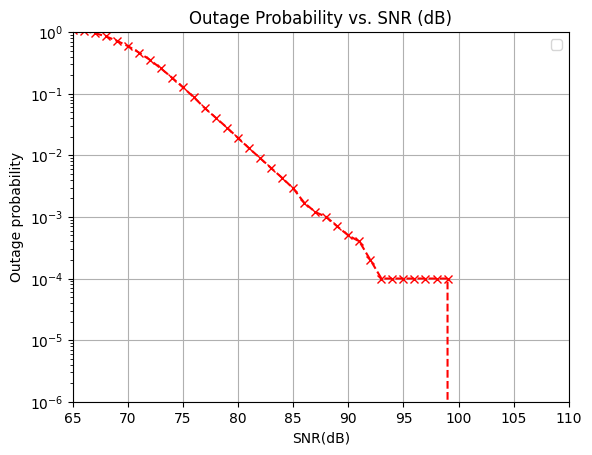

In [245]:
import numpy as np
import scipy.constants as const
import scipy.special as sp
import math
import numpy as np
import scipy.constants as const
import scipy.special as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


# Parâmetros do sistema
N = 10000
f = 300e9  # Frequência do portador em Hz (300 GHz)
G = 10e4  # Ganhos das antenas (40 dBi)
c = const.speed_of_light  # Velocidade da luz
k = 3.18e-4  # Coeficiente de absorção molecular
d1 = 5  # Distância da fonte para o RIS (em metros)
d2 = 25  # Distância do RIS para o destino (em metros)
noise_floor = 3.9811e-11   # Ruído de fundo (-74 dBm)

gain = ((c*G)/ (4*np.pi*f*(d1+d2)))*np.exp(-0.5*k* (d1+d2))

R = 2

i=0
j=0
OP1=[]
OP2=[]
N0=5000

gamma = 10**(0.1/10)
gamma_th = 10**(6/10)
k_f = 10 # k_f = [0.0, 0.1, 0.2, 0.3, 0.4] fator de comprometimento do hardware



# Parâmetros do modelo Alpha-Mu para os caminhos de propagação
alpha_1 = 2  # Parâmetro Alpha para o caminho 1
mu_1 = 1     # Parâmetro Mu para o caminho 1
alpha_2 = alpha_1  # Parâmetro Alpha para o caminho 2
mu_2 = 2     # Parâmetro Mu para o caminho 2

media1 = d1 ** (-alpha_2)
media2 = d2 ** (-alpha_2)


# Cálculo da perda de percurso para os caminhos de propagação
for j in np.arange(65, 111, 1):

    plin = 10**(j / 10)  # 10**(P_dB/10)
    r1 = np.sqrt(media1)*nakagami.rvs(mu_1, loc=0, scale=1, size=N, random_state=N)  # Rayleigh fading no primeiro caminho
    r2 = np.sqrt(media2)*nakagami.rvs(mu_2, loc=0, scale=1, size=N, random_state=N)  # Nakagami-2 fading no segundo caminho
    Prob1 = np.sum(np.log2(1 + (r1**2*plin/N0)) < R) / N
    Prob2 = np.sum(np.log2(1 + (r2**2*plin/N0)) < R) / N
    OP1 = np.append(OP1, Prob1)
    OP2 = np.append(OP2, Prob2)
    r_des_1 = (alpha_1*np.random.gamma(mu_1 + 1 / alpha_1))**(1 / alpha_1)
    r_des_2 = (alpha_2*np.random.gamma(mu_2 + 1 / alpha_2))**(1 / alpha_2)


    # Cálculo da perda de percurso total considerando o desvanecimento
    perda_total_1 = r1 * r_des_1 ** mu_1
    perda_total_2 = r2 * r_des_2 ** mu_2

    # Cálculo da potência recebida no receptor
    potencia_recebida_1 = gain - perda_total_1
    potencia_recebida_1 = gain - perda_total_2

Pdb=np.arange(65,111,1)
plt.title("Outage Probability vs. SNR (dB)")
plt.plot(Pdb,(OP2+OP1),'rx--')
plt.grid()
plt.axis([65,110,1e-6,1])
plt.xlabel('SNR(dB)')
plt.ylabel('Outage probability')
plt.legend()
plt.yscale('log')
plt.xscale()
plt.figlegend([])
plt.show()

